### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

## Introduction

Dans ce projet, nous allons nous intéresser à la vitesse d'un particule envoyée dans un cyclotron.

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![Figure3.png](./Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On prendra $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''1'''
t=np.zeros((51,))
for n in range (1,51):
    t[n]=n+0.5*np.sqrt(n)  

In [14]:
'''2'''
print(t[1]==1.5,
t[4]==5,
t[9]==10.5,
t[16]==18,
t[25]==27.5)

True True True True True


Toutes les égalités sont vraies

On définit une fonction vitesse, qui prend en entrée le n souhaité, et renvoi la vitesse en x et en y de la particule au sein du D correspondant, sous la forme d'un tableau numpy:

In [58]:
'''3'''
def vitesse(n):
    z=np.linspace(t[n+1]-1,t[n+1],50)

    vx=((-1)**n)*np.sqrt(n+1)*np.sin(np.pi*(z-t[n+1]))
    vy=-((-1)**n)*np.sqrt(n+1)*np.cos(np.pi*(z-t[n+1]))

    return vx,vy,z

On plot directement les valeurs pour les analyser, celles-ci étant difficiles à comprendre numériquement

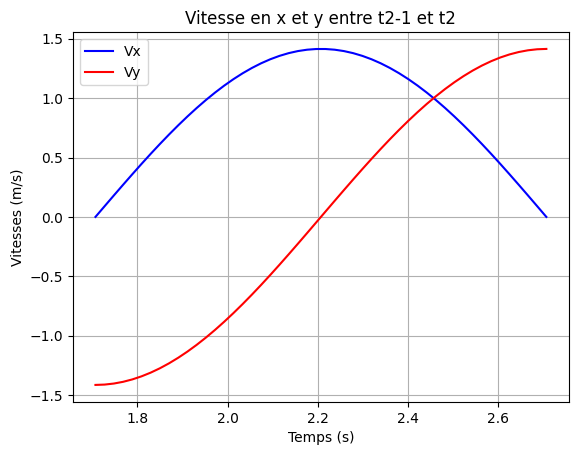

In [57]:
'''4'''
plt.plot(vitesse(1)[2],vitesse(1)[0],'b',label='Vx')
plt.plot(vitesse(1)[2],vitesse(1)[1],'r',label='Vy')
plt.grid()
plt.title('Vitesse en x et y entre t2-1 et t2')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesses (m/s)')
plt.legend()

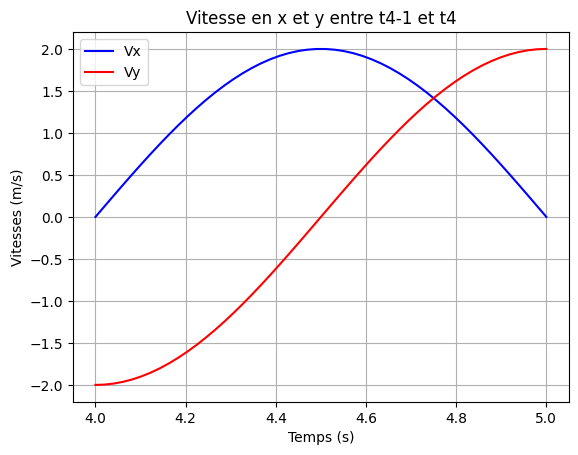

In [23]:
plt.plot(vitesse(3)[2],vitesse(3)[0],'b',label='Vx')
plt.plot(vitesse(3)[2],vitesse(3)[1],'r',label='Vy')
plt.grid()
plt.title('Vitesse en x et y entre t4-1 et t4')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesses (m/s)')
plt.legend()

In [59]:
'''5'''
def max(v,t):
    m,tm=0,0
    for i in range(len(v)):
        if v[i]>m:
            m,tm=v[i],t[i]
    return 'Vmax=',m,'pour t=',tm

print('Maximum de Vx entre t2-1 et t2:',max(vitesse(1)[0],vitesse(1)[2]))
print('Maximum de Vy entre t2-1 et t2:',max(vitesse(1)[1],vitesse(1)[2]))
print('Maximum de Vx entre t4-1 et t4:',max(vitesse(3)[0],vitesse(3)[2]))
print('Maximum de Vy entre t4-1 et t4:',max(vitesse(3)[1],vitesse(3)[2]))

Maximum de Vx entre t2-1 et t2: ('Vmax=', 1.4134869623559807, 'pour t=', 2.2173108628192004)
Maximum de Vy entre t2-1 et t2: ('Vmax=', 1.4142135623730951, 'pour t=', 2.7071067811865475)
Maximum de Vx entre t4-1 et t4: ('Vmax=', 1.998972432401376, 'pour t=', 4.489795918367347)
Maximum de Vy entre t4-1 et t4: ('Vmax=', 2.0, 'pour t=', 5.0)


On observe que les différences de vitesse max entre Vx et Vy sont très petites - de plus, on observe bien une augmentation de la vitesse de la particule entre t2-1 et t4.

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

Il faut tout d'abord créer la 2e fonction de vitesse, pour les intervalles tn à tn+1 - 1:

In [60]:
'''6'''
def vitesse2(n):
    z=np.linspace(t[n],t[n+1]-1,50)

    vx=0*z
    vy=((-1)**n)*(np.sqrt(n)+(z-t[n])/0.5)

    return vx,vy,z

On peut ensuite faire un plot par morceaux, pour n allant de 0 à 6:

Text(0, 0.5, 'Vitesses (m/s)')

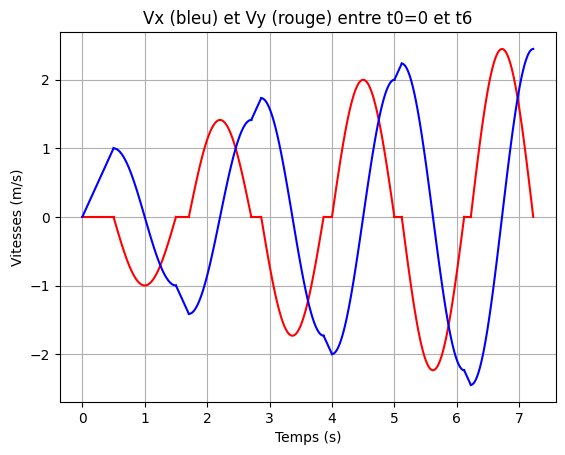

In [61]:
for i in range(6):
    plt.plot(vitesse(i)[2],vitesse(i)[0],'r')
    plt.plot(vitesse(i)[2],vitesse(i)[1],'b')
    plt.plot(vitesse2(i)[2],vitesse2(i)[0],'r')
    plt.plot(vitesse2(i)[2],vitesse2(i)[1],'b')
plt.grid()
plt.title('Vx (bleu) et Vy (rouge) entre t0=0 et t6')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesses (m/s)')

On observe une courbe sinusoidale des 2 vitesses, dont l'amplitude augmente en fonction du temps.

Pour le module aussi, on effectue une courbe par morceaux, et utilisant les 2 fonctions vitesse pour avoir l'entièreté du mouvement

Text(0.5, 0, 'Temps (s)')

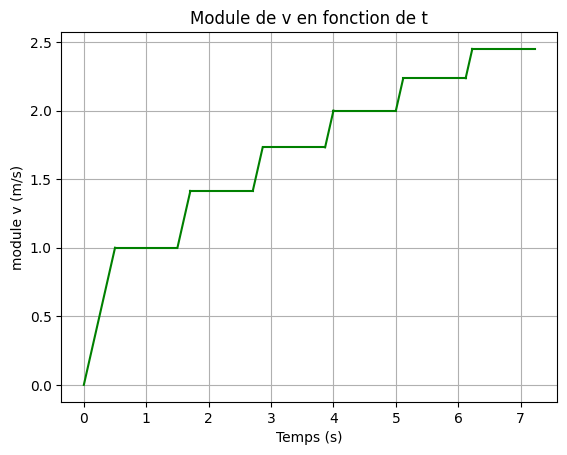

In [52]:
'''7'''
mod=np.zeros((6,))
mod2=np.zeros((6,))
for i in range(6):
    mod=np.sqrt(vitesse(i)[0]**2+vitesse(i)[1]**2)
    plt.plot(vitesse(i)[2],mod,'g')
    mod2=np.sqrt(vitesse2(i)[0]**2+vitesse2(i)[1]**2)
    plt.plot(vitesse2(i)[2],mod2,'g')
plt.grid()
plt.title('Module de v en fonction de t')
plt.ylabel('module v (m/s)')
plt.xlabel('Temps (s)')

On observe que la vitesse de la particule va augmenter après chaque tour dans le cyclotron; cette machine sert donc à accélérer des particules, ce qui est prouvé ici.

Text(0, 0.5, 'module v(tn) en m/s')

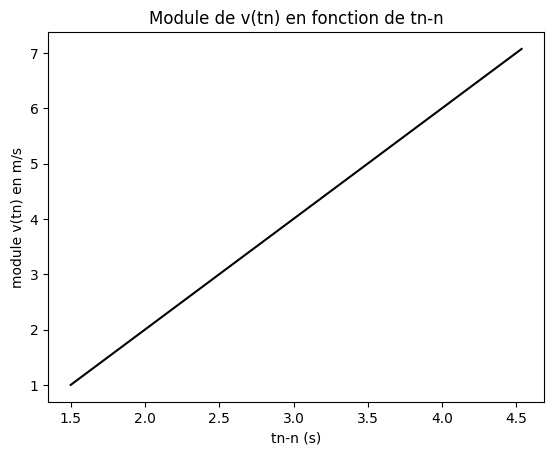

In [55]:
'''8'''
mod=np.zeros((50,))
t2=t[1:]
y=np.arange(0,50,1)
for n in range (50):
    mod[n]=np.sqrt(vitesse(n)[0][-1]**2+vitesse(n)[1][-1]**2)

plt.plot(t2-y,mod,'k')
plt.title('Module de v(tn) en fonction de tn-n')
plt.xlabel('tn-n (s)')
plt.ylabel('module v(tn) en m/s')

On peut voir, finalement, que sur l'entièreté du temps passé par la particule dans le cyclotron, celle-ci va avoir une augmentation du temps passé entre les D au fur et à mesure que se vitesse augmente, de façon linéaire.